In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [27]:
BATCH_SIZE=32
IMAGE_SIZE=300
CHANNELS=3
EPOCHS=40

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Rice-Leaf-Disease-Classification-using-CNN",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5932 files belonging to 4 classes.


In [4]:
class_names=dataset.class_names
class_names

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

(32, 300, 300, 3)
[1 2 1 3 0 3 2 3 2 0 0 0 0 3 2 1 3 0 3 2 0 2 1 2 0 1 3 0 1 2 3 0]


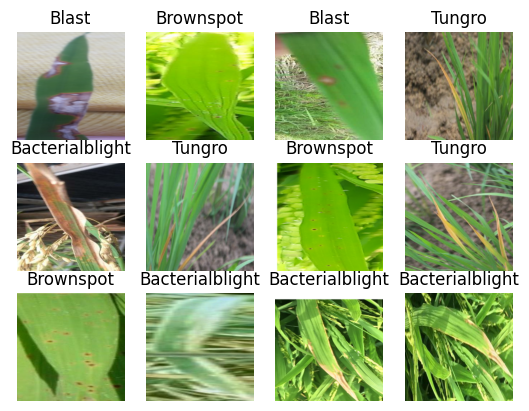

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
#80% for Training
#20% for Test:
    #10% for validation
    #10% for test

In [7]:
train_size=0.8
len(dataset)*train_size

148.8

In [8]:
train_ds=dataset.take(148)
len(train_ds)

148

In [9]:
test_ds=dataset.skip(148)
len(test_ds)

38

In [10]:
val_size=0.1
len(dataset)*val_size

18.6

In [11]:
val_ds=test_ds.take(18)
len(val_ds)

18

In [12]:
test_ds=test_ds.skip(18)
len(test_ds)

20

In [13]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds= get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

148

In [16]:
len(val_ds)

18

In [17]:
len(test_ds)

20

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.89411765 0.9098039  0.90588236]
  [0.8901961  0.90588236 0.9019608 ]
  [0.8862745  0.9019608  0.8980392 ]
  ...
  [0.7137255  0.70980394 0.69411767]
  [0.7058824  0.70980394 0.6901961 ]
  [0.69803923 0.7019608  0.6784314 ]]

 [[0.9137255  0.92941177 0.9254902 ]
  [0.9098039  0.9254902  0.92156863]
  [0.9019608  0.91764706 0.9137255 ]
  ...
  [0.72156864 0.7176471  0.7019608 ]
  [0.7058824  0.70980394 0.6862745 ]
  [0.69411767 0.69803923 0.6666667 ]]

 [[0.9098039  0.9254902  0.92156863]
  [0.90588236 0.92156863 0.91764706]
  [0.9019608  0.91764706 0.9137255 ]
  ...
  [0.7137255  0.7137255  0.68235296]
  [0.7137255  0.72156864 0.6784314 ]
  [0.7137255  0.72156864 0.6784314 ]]

 ...

 [[0.6039216  0.7294118  0.4745098 ]
  [0.6        0.7254902  0.4627451 ]
  [0.6        0.7294118  0.45882353]
  ...
  [0.54901963 0.5529412  0.53333336]
  [0.5647059  0.5686275  0.54901963]
  [0.5764706  0.5803922  0.56078434]]

 [[0.6313726  0.7490196  0.5058824 ]
  [0.627451   0.74509805 0.49411765]


In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=4

In [23]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 300, 300, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 300, 300, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 298, 298, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 149, 149, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 147, 147, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 73, 73, 32)          0         
 g2D)                                                 

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

In [28]:
score=model.evaluate(test_ds)

20/20 [==============================] - 31s 456ms/step - loss: 0.0045 - accuracy: 1.0000


In [29]:
len(test_ds)

20

In [30]:
history.params


{'verbose': 1, 'epochs': 40, 'steps': 148}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

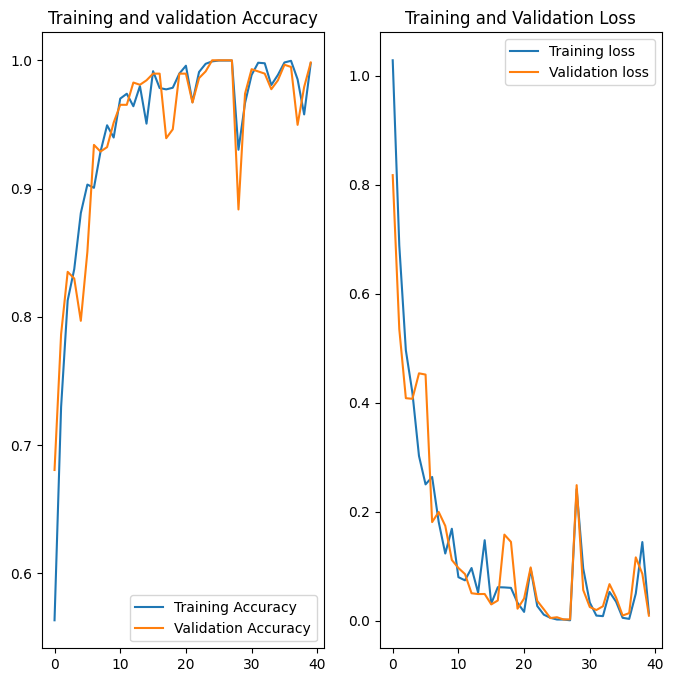

In [50]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(loss,label='Training loss')
plt.plot(val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Lable: Tungro
1/1 [==============================] - 0s 308ms/step
Predicted Label: Tungro


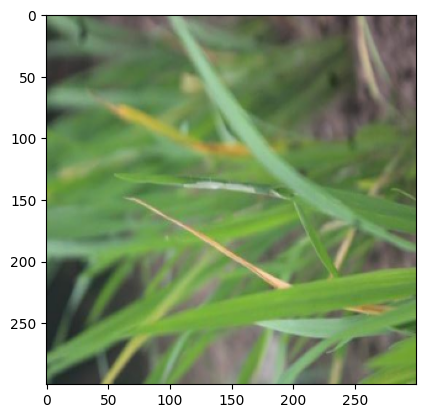

In [65]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Lable:",class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
    

In [71]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions=model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence =round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 83ms/step


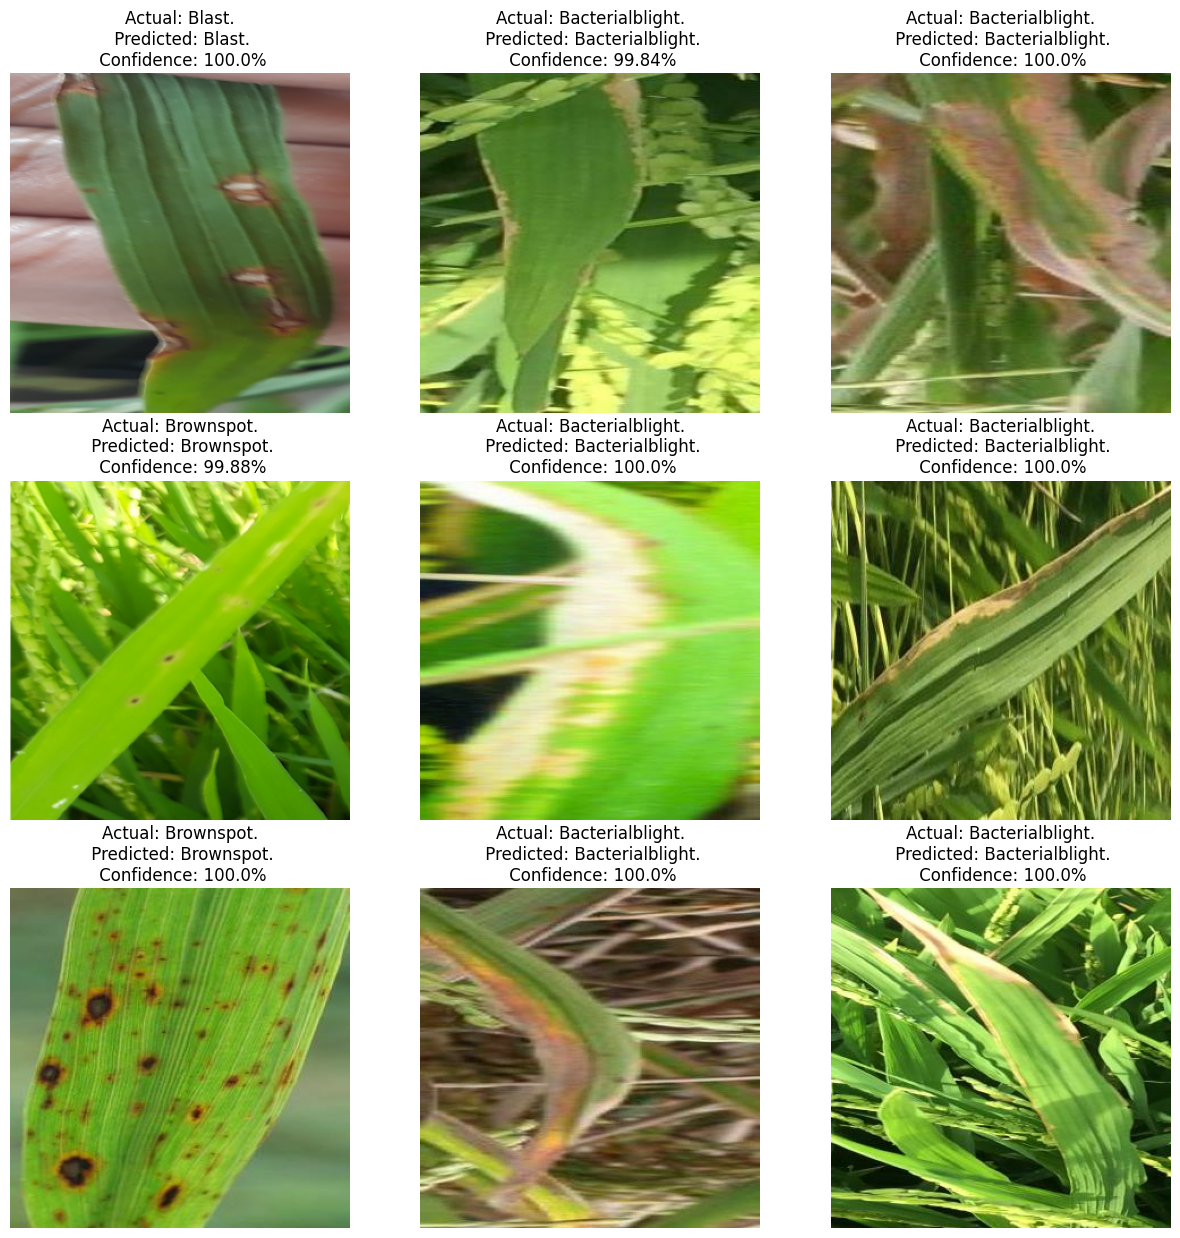

In [79]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class ,confidence = predict(model,images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}.\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [75]:
model_version=1
model.save(f"./models/version{model_version}")

INFO:tensorflow:Assets written to: ./models/version1\assets


INFO:tensorflow:Assets written to: ./models/version1\assets


In [2]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_ds, test_ds)
print("Accuracy:", accuracy)

NameError: name 'train_ds' is not defined